In [50]:
import numpy as np

In [84]:
# Create a linear regression class

class LinReg:
    # Take in variables
    def __init__(self, max_iterations=1000, delta=0.001, alpha=0.005):
        self.max_iterations = max_iterations
        self.delta = delta
        self.alpha = alpha
        
    def fit(self, X, y, method):
        self.X = X
        self.y = y
        self.method = method
        
        num_samples = self.X.shape[0]
        ones_column = np.ones(num_samples)  
        X = np.column_stack((ones_column, self.X))        
        X_t = X.transpose()
        
        if method == "analytic":
            XtX = np.matmul(X_t, X)
            XtX_inv = np.linalg.inv(XtX)
            self.theta_anal = np.matmul(np.matmul(XtX_inv , X_t), self.y)
            
        elif method == "iterative":
            cost_hist = np.array([])
            theta_guess = np.ones(X.shape[1])
            for i in range(self.max_iterations):
                hypothesis = X.dot(theta_guess)
                temp_obj = np.multiply(X_t, (hypothesis-self.y))
                dJdTheta = temp_obj.sum(axis=1) / num_samples
                theta_guess = theta_guess - self.alpha*dJdTheta
                
                cost_fun = (np.square(hypothesis-self.y)).sum() / (2*num_samples)
                cost_hist = np.append(cost_hist, cost_fun)
                if all(abs(a) < self.delta for a in dJdTheta):
                    print(dJdTheta)
                    break     
            self.theta_iter = theta_guess
            self.cost_hist = cost_hist
        
        else:
            print("Input either \"analytic\" or \"iterative\" for method")
            
    def predict(self, X_samples):
        self.X_samples = X_samples
        try:
            beta_fitted = self.theta_anal
        except ExplicitException:
            try: 
                beta_fitted = self.theta_iter
            except ExplicitException:
                print("Get a fit first before making predictions!")
    
#         if 'self.theta_anal' in locals():
#             beta_fitted = self.theta_anal
#         elif 'self.theta_iter' in locals():
#             beta_fitted = self.theta_iter
#         else:
#             print("Get a fit first before making predictions!")  
        self.y_predicted = np.matmul(self.X_samples, beta_fitted)

        pass


In [85]:
# Create a test case generator
def generate_linear_dataset(beta1, beta2, n, std_dev):
    X1 = np.random.random(n) * 100
    X2 = np.random.random(n) * 100
    eps = np.random.randn(n) * std_dev
    y = X1*beta1 + X2*beta2 + eps
    X = np.column_stack((X1, X2))
    return X, y

def generate_samples(num_ind_variables, num_samples):
    X_temp = np.random.rand(num_samples, num_ind_variables) * 100
    ones_column = np.ones(num_samples)
    X = np.column_stack((ones_column, X_temp))
    return X

In [86]:
X, y = generate_linear_dataset(7, 4, 100, 1.6)

In [87]:
test1 = LinReg(max_iterations=15, alpha=0.0001)
test1.fit(X, y, "analytic")

In [88]:
test1.theta_anal

array([ 0.56420216,  6.9976625 ,  3.99585949])

In [89]:
test1.fit(X, y, "iterative")

In [90]:
test1.theta_iter

array([ 1.0784977 ,  6.64139514,  4.37677153])

In [91]:
import matplotlib.pyplot as plt

In [92]:
x_range = list(range(1, test1.cost_hist.shape[0]+1))
plt.fill_between(x_range, test1.cost_hist)
plt.xlabel('iteration')
plt.ylabel('cost function')

Text(0,0.5,'cost function')

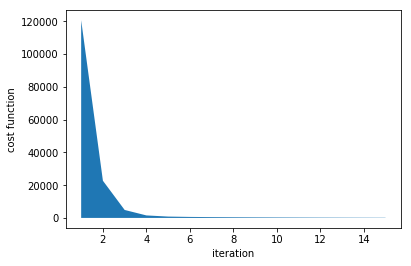

In [93]:
plt.show()

In [94]:
test1.theta_anal[0]

0.56420216434758785

In [95]:
X_samples = generate_samples(2, 100)

In [96]:
test1.predict(X_samples)

In [97]:
test1.y_predicted

array([ 932.49063125,  676.24817542,  800.55469377,  593.71760641,
        833.80594465,  228.01872164,  955.10423407,  400.03093191,
        444.16378482,  517.42720157,  683.21602177,  538.77605716,
        913.30401994,  366.19623393,  274.99564442,  214.17510902,
        587.5242169 ,  622.40689127,  481.33994447,  685.45128799,
        512.50745834,  415.3993733 ,  498.33244755,  132.28752048,
        248.70069089,  874.32899349,  421.29251586,  352.06177573,
        703.91224604,  142.65237433,  401.45558664,  653.60024116,
        565.29410499,  253.33892507,  357.82114057,  658.8727769 ,
        779.70281848,  993.85321091,  187.601726  ,  392.36356843,
        752.8109619 ,  588.09183164,  339.04119652,  556.67915669,
        322.50987832,  789.72168978,  829.20528173,  534.85274225,
        733.33116558,  491.49097353,  809.64331861,  683.97532272,
        472.27818632,  470.12425366,  126.93500375,  272.35271192,
        427.02825697,  413.04572921,  631.31397813,  550.76202